In [1]:
# import librabies
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images , train_labels), (test_images , test_labels) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# image processing
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation = 'softmax') #output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9138 - loss: 0.2307


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8871 - loss: 0.3294
Test accuracy:  0.885200023651123


In [17]:
predictions = model.predict(test_images)
print(np.argmax(predictions[5]))
print(class_names[np.argmax(predictions[5])])
# print(class_names[np.argmax(predicti+ons[0])])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1
Trouser


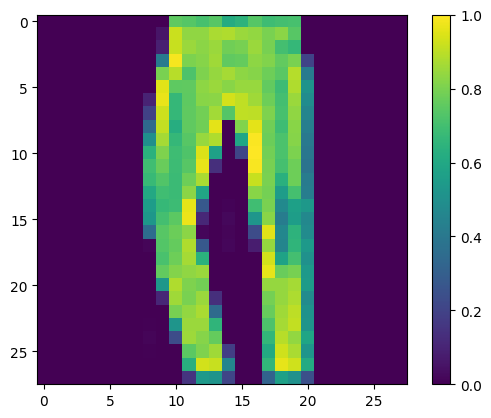

In [18]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Expected: Dress
Guess: Dress


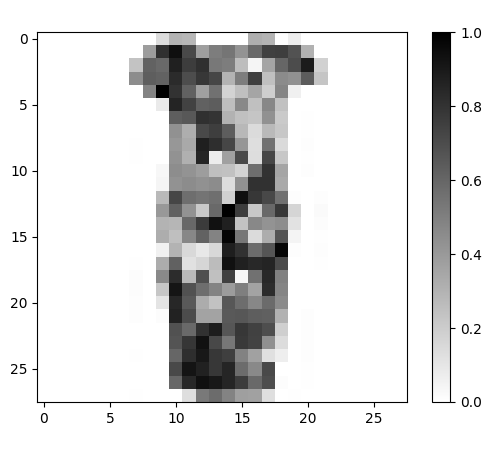

In [20]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img,label,guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    print("Expected: " + label)
    print("Guess: " + guess)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
